# T011 ·查询在线API网络服务
* * 注意：** 这篇谈话文章是TeachOpenCADD的一部分，该平台旨在教授特定领域的技能并提供管道模板作为研究项目的起点。

作者：
- Jaime Rodríguez-Guerra，2020-2021，[Amsteramer Lab，Charité](https：//volkamerab.org/）
- Dominique Sydow，2021年，[Amplamer Lab，Charité]（https：//volkamerab.org/）
- David Scholer，2021年，[Amplamer实验室，Charité]（https：//volkamerab.org/)

## 本期脱口秀的目标

在本笔记本中，您将学习如何在药物设计的背景下以编程方式使用Python的在线网络服务。在本期谈话结束时，您将熟悉REST服务和Web抓取。

# 理论内容
* 从服务器端角度进行数据访问

# 实用内容
* 下载静态文件
* 删除动态生成的内容
* 编程接口
* 文档解析
* 浏览器遥控器

# 参考文献

本指南非常实用，为了清晰起见省略了一些技术定义。然而，您还应该处理一些基本术语，以充分了解幕后发生的事情。
* [客户端-服务器模型](https：//en.wikipedia.org/wiki/Client%E2%80%93server_模型）
* [Web API]（https：//en.wikipedia.org/wiki/Web_API）
* [查询字符串]（https：//en.wikipedia.org/wiki/Credy_str串）
* [REST]（https：//en.wikipedia.org/wiki/Representational_state_transfer）
* [JSON]（https：//en.wikipedia.org/wiki/JSON）
* [Swagger / OpenAPI]（https：//en.wikipedia.org/wiki/Swagger_（软件））
* [HTTP概述]（https：//developer.mozilla.org/en-US/docs/Web/HTTP/Overview)

## 理论

互联网是相互连接、交换数据的计算机的集合。在某种程度上，您本质上是使用某些参数来查询机器(服务器)以检索特定数据。该数据将是：
- **A**。直接提供服务，因为服务器只是一个文件存储库。例如，您可以[从他们的服务器下载Chembl数据库dump](ftp://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/)。
- **B**。从数据库中检索并以特定方式格式化。您在浏览器上看到的结果是：
- **B1**。在服务器上进行预处理，例如，当您访问任何[Wikipedia](https://en.wikipedia.org/wiki/Drug_design).中的文章]时看到的HTML页
- **B2**。在您使用网站时在客户端(您的浏览器)上动态生成，例如Twitter、Facebook或任何现代网络应用程序。
- **C**。通过在服务器端执行一个或多个程序来计算，例如使用[Protoss](https://proteins.plus/help/tutorial).估计蛋白质-配体复合体的质子化状态

> 从某种意义上说，配置**C**是**B1**的一种特殊类型。您只是替换了在服务器上运行的任务类型：数据库查询和处理您的查询并返回以特定于域的方式格式化的数据的HTMLRenating_vs._Computation。

对在线服务进行分类的另一种方法是按返回数据的格式进行分类。您在浏览器上看到的大多数页面都使用了HTML，通常侧重于以人类可读的方式显示数据。但是，一些服务器可能会以机器可读的方式组织数据。这些数据可以以可靠的方式处理，因为它使用一组一致的规则进行格式化，这些规则可以很容易地在程序中编码。这样的程序通常被称为解析器。可以用可以可靠地获取数据的方式来标记HTML，但在设计它时并没有考虑到这一目的。因此，我们通常更喜欢使用提供机器可读格式的服务，如JJSON、CSV或XML。

在实践中， 两种数据呈现方式应该和谐共存。现代网络架构努力将数据检索任务与最终用户表示分开。一种流行的实现包括使用编程端点，该端点返回机器可读的JSON数据，然后由面向用户的Web应用程序消费。后者在服务器上呈现HTML-选项 **B1**-或在用户浏览器上呈现HTML-选项 **B2**。不幸的是，与面向用户的应用程序不同，编程端点（API）并不保证公开可用，并且有时仅限于服务器端的内部使用。

在以下部分中，我们将讨论如何使用Python和一些库充分利用每种类型的在线服务！

## 实用

In [1]:
from pathlib import Path

HERE = Path(_dh[-1])
DATA = HERE / "data"
TMPDATA = DATA / "_tmp"  # this dir is gitignored
TMPDATA.mkdir(parents=True, exist_ok=True)

# 下载静态文件

在这种情况下，Web服务器托管您将立即下载和消费的文件。您需要做的就是向服务器查询正确的地址或_URL_（通用资源位置）。当您浏览互联网时您总是这样做，您也可以使用Python来做到这一点！

例如，让我们获取这个[来自GitHub的kinase相关CSV数据集](https：//github.com/openkinome/kinodata/blob/master/data/KinHubKinaseList.csv），其中包含一系列kinase及其标识符。

> 提示：每当您想要下载GitHub上托管的文件时，请使用“Raw”按钮获取可下载的URL！
> > ! [image.png]（附件：f87 e4 f54 -5504- 49ca-a24a-f903aab4fa1e.png）

虽然Python提供了一个库来处理HTTP查询（' urllib ')，但人们通常更喜欢使用第三方'请求'，因为使用要简单得多。

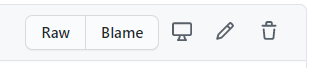

In [2]:
import requests

url = "https://raw.githubusercontent.com/openkinome/kinodata/master/data/KinHubKinaseList.csv"
response = requests.get(url)
response.raise_for_status()
response

#NBVAR_RST_输出

<Response [200]>

当您使用“请求.get（.）”时您将获得一个“Response”对象。这不是您想要下载的文件，而是一个包装了HTTP查询和服务器给您的_respond_的对象。在检查内容之前，我们总是调用'.raise_for_Status（）'，如果服务器告诉我们无法满足请求，这将引发异常。服务器如何做到这一点？带有[HTTP状态代码](https：//en.wikipedia.org/wiki/List_of_HTTP_status_Codes），3位数字。有几种，但最常见的是：
* 200：一切都好！
* 404：找不到文件。
* 500：服务器错误。

如果您的响应没有获得200代码，'.raise_for_Status（)'将提出投诉。因此，将其命名为after _every_quick是一个很好的做法！

请参阅这个错误URL的例子，它包含一个错误：那里没有 ** XT ** 文件，只有 **CSV*。

In [3]:
#NBVAR_RAISES_EXCEPTION
bad_url = "https://raw.githubusercontent.com/openkinome/kinodata/master/data/KinHubKinaseList.txt"
bad_response = requests.get(bad_url)
bad_response.raise_for_status()
bad_response

HTTPError: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/openkinome/kinodata/master/data/KinHubKinaseList.txt

好的，现在让我们来看看CSV文件的内容！根据您正在寻找的内容，您将需要以下属性之一：
* ' respect.content '：服务器返回的_bytes_。 
* ' respect.text '：文件的内容，如果可能的话，以字符串形式出现。
* ' respondance.json（）'：如果服务器返回JSON数据（稍后会详细介绍），此方法将对其进行解析并返回相应的字典。

你应该使用哪一个？如果您想在Notebook输出中显示some _text_，请选择'.text '。涉及二进制文件的所有内容（图像、档案、PDF.）或下载到磁盘应使用'.content '。


由于这是CSV文件，我们知道这是一个纯文本文件，所以我们可以在它上使用通常的Python方法！让我们打印前10行：

In [4]:
print(*response.text.splitlines()[:10], sep="\n")

﻿xName,Manning Name,HGNC Name,Kinase Name,Group,Family,SubFamily,UniprotID
ABL1,ABL,ABL1,Tyrosine-protein kinase ABL1,TK,Abl,,P00519
ACK,ACK,TNK2,Activated CDC42 kinase 1,TK,Ack,,Q07912
ACTR2,ACTR2,ACVR2A,Activin receptor type-2A,TKL,STKR,STKR2,P27037
ACTR2B,ACTR2B,ACVR2B,Activin receptor type-2B,TKL,STKR,STKR2,Q13705
ADCK4,ADCK4,ADCK4,Uncharacterized aarF domain-containing protein kinase 4,Atypical,ABC1,ABC1-A,Q96D53
Trb1,Trb1,TRIB1,Tribbles homolog 1,CAMK,Trbl,,Q96RU8
BRSK2,BRSK2,BRSK2,Serine/threonine-protein kinase BRSK2,CAMK,CAMKL,BRSK,Q8IWQ3
Wnk2,Wnk2,WNK2,Serine/threonine-protein kinase WNK2,Other,WNK,,Q9Y3S1
AKT1,AKT1,AKT1,RAC-alpha serine/threonine-protein kinase,AGC,Akt,,P31749


当然，您可以使用通常的Python结构将其保存到磁盘。由于我们正在_下载_，建议使用原始字节内容，而不是文本版本！这意味着您应该使用“respect.content”并以字节模式打开您的文件（“”中的“b”）：

In [5]:
with open(TMPDATA / "kinhub.csv", "wb") as f:
    f.write(response.content)

再次打开它以检查我们写了什么。

In [6]:
#我们需要encoding=“utf-8-sig”来确保正确的编码
#所有平台下
with open(TMPDATA / "kinhub.csv", encoding="utf-8-sig") as f:
    # Zip将停止使用最短迭代器迭代
    #传递' Range（5）'允许我们只得到五行;）
    for _, line in zip(range(5), f):
        print(line.rstrip())

#NBVAR_RST_输出

xName,Manning Name,HGNC Name,Kinase Name,Group,Family,SubFamily,UniprotID
ABL1,ABL,ABL1,Tyrosine-protein kinase ABL1,TK,Abl,,P00519
ACK,ACK,TNK2,Activated CDC42 kinase 1,TK,Ack,,Q07912
ACTR2,ACTR2,ACVR2A,Activin receptor type-2A,TKL,STKR,STKR2,P27037
ACTR2B,ACTR2B,ACVR2B,Activin receptor type-2B,TKL,STKR,STKR2,Q13705


* * 提示 **：如果您只想下载CSV文件以使用Pandas打开它，则只需将原始URL传递给“pandas.read_CSV”即可。它会为您下载该文件！

In [7]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/openkinome/kinodata/master/data/KinHubKinaseList.csv"
)
df.head()
#NBVAR_RST_输出

,xName,Manning Name,HGNC Name,Kinase Name,Group,Family,SubFamily,UniprotID
0,ABL1,ABL,ABL1,Tyrosine-protein kinase ABL1,TK,Abl,NaN,P00519
1,ACK,ACK,TNK2,Activated CDC42 kinase 1,TK,Ack,NaN,Q07912
2,ACTR2,ACTR2,ACVR2A,Activin receptor type-2A,TKL,STKR,STKR2,P27037
3,ACTR2B,ACTR2B,ACVR2B,Activin receptor type-2B,TKL,STKR,STKR2,Q13705
4,ADCK4,ADCK4,ADCK4,Uncharacterized aarF domain-containing protein...,Atypical,ABC1,ABC1-A,Q96D53


关于文件下载的一个注意事项。上面的方法将整个文件下载到内存中，这对于非常大的文件来说可能是一个问题。如果您打算下载非常大的文件，可以使用[流请求](https：//请求. readthedocs.io/en/master/user/advanced/#streaming-equals）和[原始响应]（https：docs.python-requests.org/en/v1.1.0/user/quickstart/? highlight=raw %20respond #raw-respond-content）。作为一个例子，让我们假设这个[1 MB视频]（https：//archive.org/Downlo/SlowMotionFlame/slomofflam_512kb.mp4)_太大，无法容纳内存_：

In [8]:
import shutil
from IPython.display import Video

response = requests.get(
    "https://archive.org/download/SlowMotionFlame/slomoflame_512kb.mp4", stream=True
)
response.raise_for_status()

with open(TMPDATA / "video.mp4", "wb") as tmp:
    for chunk in response.iter_content(chunk_size=8192):
        tmp.write(chunk)

    #让我们在Ottyter中播放电影吧！
    #传递给小部件的路径需要相对于笔记本，否则它们将404：）
    display(Video(Path(tmp.name).relative_to(HERE)))

# 访问动态生成的内容

到目前为止，我们已经能够检索远程服务器上的_FILES_。为此，我们使用了`quests.get`和一个指向该文件的URL。

嗯，事实证明，同样的技术将适用于更多类型的内容！我们不关心服务器如何处理URL！无论服务器只需要给你一个磁盘上的文件，还是查询一个数据库并将不同的部分组装成返回的内容，这一点都不重要。

正如您现在将看到的，仅这一概念就非常强大。请记住：**我们只需确保请求的URL正确！**

现在让我们来做一些有趣的事情吧！SARS-CoV-2中的Spike蛋白是最近最受欢迎的蛋白之一，我们能从[UniProt](https://www.uniprot.org/)使用`Requests‘)获得一些信息吗？其UniProt ID为`P0DTC2`。[查看您的浏览器first](https://www.uniprot.org/uniprot/P0DTC2)，，您应该会看到如下所示：

！[SARS-CoV-2 UniProt入口](图像/UniProt-sars-cov-2.jpg)

UniProt提供的其中一件事是列出的蛋白质的氨基酸序列。向下滚动，直到您看到此部分：

！[SARS-CoV-2](images/uniprot-sars-cov-2-sequence.jpg)的序列

你认为我们能用Python得到唯一的序列吗？让我们看看!

要查询蛋白质，只需将其UniProt ID添加到URL。

In [9]:
r = requests.get("https://www.uniprot.org/uniprot/P0DTC2")
r.raise_for_status()
print(r.text[:5000])

<!doctype html><html lang="en"><head><meta charset="utf-8"/><title>UniProt</title><meta name="viewport" content="width=device-width,initial-scale=1"/><meta name="theme-color" content="#00639a"/><link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png"/><link rel="shortcut icon" type="image/png" sizes="144x144" href="/mstile-144x144.png"/><link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png"/><link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png"/><link rel="manifest" href="/manifest.json"/><link rel="preconnect" href="https://fonts.gstatic.com/"/><link rel="preconnect" href="https://rest.uniprot.org/"/><link rel="preload" as="style" href="https://fonts.googleapis.com/css?family=Lato:400,700|Source+Sans+Pro:600,700&display=swap"/><script async src="https://www.googletagmanager.com/gtag/js?id=G-V6TXEC4BDF"></script><script>window.dataLayer = window.dataLayer || [];
      function gtag() {
        dataLayer.push(arguments);
      }
  

哇，那是什么声音啊？您看到的是该网页的Html内容！这是Web开发人员用来编写网页的标记语言。

有一些库可以处理HTML并提取实际内容(比如`BeautifulSoup`；下面还有更多内容)，但我们在这里还不需要它。幸运的是，UniProt提供了数据的其他表示形式。

！[UniProt formats](images/uniprot-sars-cov-2-formats.jpg)

有些格式更便于编程使用。如果你点击`文本`，你会在浏览器中看到一些不同的东西：纯文本！另外，请注意URL现在有了怎样的不同。
* Html表示(默认)：https://www.uniprot.org/uniprot/P0DTC2
* 文本表示：https://www.uniprot.org/uniprot/P0DTC2.txt

只需添加`.txt`扩展名就足以改变样式。这是UniProt提供的一个很好的功能。它模仿文件系统，但实际上改变了返回内容的表示形式。优雅！更重要的是，更易于以编程方式使用！检查它：

In [10]:
r = requests.get("https://www.uniprot.org/uniprot/P0DTC2.txt")
r.raise_for_status()
print(r.text[:1000])

ID   SPIKE_SARS2             Reviewed;        1273 AA.
AC   P0DTC2;
DT   22-APR-2020, integrated into UniProtKB/Swiss-Prot.
DT   22-APR-2020, sequence version 1.
DT   03-MAY-2023, entry version 16.
DE   RecName: Full=Spike glycoprotein {ECO:0000255|HAMAP-Rule:MF_04099};
DE            Short=S glycoprotein {ECO:0000255|HAMAP-Rule:MF_04099};
DE   AltName: Full=E2 {ECO:0000255|HAMAP-Rule:MF_04099};
DE   AltName: Full=Peplomer protein {ECO:0000255|HAMAP-Rule:MF_04099};
DE   Contains:
DE     RecName: Full=Spike protein S1 {ECO:0000255|HAMAP-Rule:MF_04099};
DE   Contains:
DE     RecName: Full=Spike protein S2 {ECO:0000255|HAMAP-Rule:MF_04099};
DE   Contains:
DE     RecName: Full=Spike protein S2' {ECO:0000255|HAMAP-Rule:MF_04099};
DE   Flags: Precursor;
GN   Name=S {ECO:0000255|HAMAP-Rule:MF_04099}; ORFNames=2;
OS   Severe acute respiratory syndrome coronavirus 2 (2019-nCoV) (SARS-CoV-2).
OC   Viruses; Riboviria; Orthornavirae; Pisuviricota; Pisoniviricetes;
OC   Nidovirales; Cornidovirineae;

这正是我们在浏览器上看到的！纯文本对于这些事情来说是很好的。但是，该序列一直位于文件的末尾。要检索它，你需要有创意，并分析每一行都有的那些小标签。查看以`SQ`开头，以`//`结尾：

```SQ序列1273AA；141178 mW；B17BE6D9F1C4EA34CRC64；
MFVFLVLLPL VSSQCVNLTT RTQLPPAYTN SFTRGVYYPD KVFRSSVLHS TQDLFLPFFS
NVTWFHAIHV SGTNGTKRFD NPVLPFNDGV YFASTEKSNI IRGWIFGTTL DSKTQSLLIV
NNatNVVIKV CEFQFCNDPF LGVYYHKNNK SWMESEFRVY SSANNCTFEY VSQPFLMDLE
GKQGNFKNLR EFVFKNIDGY FKIYSKHTPI NLVRDLPQGF SALEPLVDLP IGINITRFQT
LLALHRSYLT PGDSSSGWTA GAAYYVGYL QPRTFLYKYN ENGTITDAVD CALDPLSETK
CTLKSFTVEK GIYQTSNFRV QPTESIVRFP NITNLCPFGE VFNatRFASV YAWNRKRISN
CVADYSVLYN SASFSTFKCY GVSPTKLNDL CFTNVYADSF VIRGDEVRQI APGQTGKIAD
YNYKLPDDFT GCVIAWNSNN LDSKVGGNYN YLYRLFRKSN LKPFERDIST EIYQAGSTPC
NGVEGFNCYF PLQSYGFQPT NGVGYQPYRV VVLSFELLHA PATVCGPKKS TNLVKNKCVN
FNFNGLTGTG VLTESNKFL PFQFGRDIA DTTDAVRDPQ TLEILDITPC SFGGVSVITP
GTNTSNQVAV LYQDVNCTEV PVAIHADQLT PTWRVYSTGS NVFQTRAGCL IGAEHVNNSY
ECDIPIGAGI CASYQTQTNS PRARARSVASQ SIIAYTM TMSLG AENSVAYSNN SIAIPTNFTI
SVTTEILPVS MTKTSVDCTM YICGDSTECS NLLLQYGSFC TQLNRALTGI AVEQDKNTQE
VFAQVKQIYK TPPIKDFGGF NFSQILPDPS KPSKRSFIED LLFNKVTLAD AGFIKQYGDC
LGDIAARDLI CAQKFNGLTV LPPLLTDEMI AQYTSALLAG TITSGWTFGA GAALQIPFAM
QMAYRFNGIG VTQNVLYENQ KLIANQFNSA IGKIQDSLSS TASALGKLQD VVNQNAQALN
TLVKQLSSF GAISSVLNDI LSRLDKVEAE VQIDRLITGR LQSLQTYVTQ QLIRAEIRA
SANLAATKMS ECVLGQSKRV DFCGKGYHLM SFPQSAPHGV VFLHVTYVPA QEKNFTTAPA
ICHDGKAHFP REGVFVSNGT HWFVTQRNFY EPQIITTDNT FVSGNCDVVI GIVNNTVYDP
LQPELDSFKE ELDKYFKNHT SPDVDLGDIS GINASVVNIQ KEIDRLNEVA KNLNESLIDL
QELGKYEQYI KWPWYIWLGF IAGLIAIVMV TIMLCCMTSC CSCLKGCCSC GSCCKFDEDD
SEPVLKGVKL HYT
//
```因此，您可以这样做：

In [11]:
sequence_block = False
lines = []
for line in r.text.splitlines():
    if line.startswith("SQ"):
        sequence_block = True
    elif line.startswith("//"):
        sequence_block = False

    if sequence_block:
        line = line.strip()  # delete spaces and newlines at the beginning and end of the line
        line = line.replace(" ", "")  # delete spaces in the middle of the line
        lines.append(line)
sequence = "".join(lines[1:])  # the first line is the metadata header
print(f"This is your sequence: {sequence}")

#NBVAR_RST_输出

This is your sequence: MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVL

叮咚！我们明白了！它需要一些处理，但它有效.然而，您应该始终想知道是否有更简单的方法。鉴于UniProt有一种很好的方式来提供文本表示，为什么他们不提供_only_返回给定UniProt ID序列的URL呢？好吧，他们做到了！只需将'. text '更改为'.fasta '：https://www.uniprot.org/uniprot/P0DTC2.fasta

In [12]:
r = requests.get("https://www.uniprot.org/uniprot/P0DTC2.fasta")
r.raise_for_status()
print(r.text)

#NBVAR_RST_输出

>sp|P0DTC2|SPIKE_SARS2 Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=S PE=1 SV=1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFS
NVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIV
NNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLE
GKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQT
LLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETK
CTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISN
CVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIAD
YNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPC
NGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVN
FNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITP
GTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSY
ECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTI
SVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQE
VFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDC
LGDIAARDLICAQKFNGLTVLPPLLTD

这在FASTA中返回，FASTA是生物信息学中的常见语法。您也可以使用[BioPython](https：//biopython.org/)等现有库来解析它！

In [13]:
from Bio import SeqIO
from tempfile import NamedTemporaryFile
import os

#将响应写入临时文本文件
with NamedTemporaryFile(suffix=".fasta", mode="w", delete=False) as tmp:
    tmp.write(r.text)

#为序列数据创建BioPython对象：
sequence = SeqIO.read(tmp.name, format="fasta")

#既然我们已经阅读了临时文件，就删除它
os.remove(tmp.name)

print(sequence.description)
print(sequence.seq)

#NBVAR_RST_输出

sp|P0DTC2|SPIKE_SARS2 Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=S PE=1 SV=1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTI

所有这些访问UniProt中包含的数据的不同表示形式或部分的方法都构成了基于URL的API（应用程序编程接口）。基本原则是URL包含向服务器请求特定类型内容所需的所有 ** 参数 **。是的，您没有看错：** 参数 **。如果您仔细考虑一下，URL会指定两部分：您正在连接的机器以及您想要访问的机器中的页面。当页面部分缺失时，服务器会假设您正在请求“index.html”或同等内容。

让我们将其与命令行界面进行比较：

```@ #这是您的浏览器
@ uniprot.org/uniprot/P0DTC2.fasta
```'猛烈抨击
$ #这是您的终端
$ uniprot --id= P0 DTC 2--格式=FASTA
```URL的每个部分都可以被视为位置参数！因此，如果您想要不同蛋白质的序列，只需在URL中输入其UniProt ID即可，完成！例如，“P00519”是ABL 1酶的ID。

In [14]:
r = requests.get("https://www.uniprot.org/uniprot/P00519.fasta")
r.raise_for_status()
print(r.text)

#NBVAR_RST_输出

>sp|P00519|ABL1_HUMAN Tyrosine-protein kinase ABL1 OS=Homo sapiens OX=9606 GN=ABL1 PE=1 SV=4
MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAARWNSKENLLAGPSE
NDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVN
SLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTAS
DGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAPKRNKPTVYGVSPNYDKWEMERT
DITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQ
LLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVNAVVLLYMATQISSAMEYLEKKNFI
HRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKS
DVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNP
SDRPSFAEIHQAFETMFQESSISDEVEKELGKQGVRGAVSTLLQAPELPTKTRTSRRAAE
HRDTTDVPEMPHSKGQGESDPLDHEPAVSPLLPRKERGPPEGGLNEDERLLPKDKKTNLF
SALIKKKKKTAPTPPKRSSSFREMDGQPERRGAGEEEGRDISNGALAFTPLDTADPAKSP
KPSNGAGVPNGALRESGGSGFRSPHLWKKSSTLTSSRLATGEEEGGGSSSKRFLRSCSAS
CVPHGAKDTEWRSVTLPRDLQSTGRQFDSSTFGGHKSEKPALPRKRAGENRSDQVTRGTV
TPPPRLVKKNEEAADEVFKDIMESSPGSSPPNLTPKPLRRQVTVAPASGLPHKEEAGKGS
ALGTPAAAEPVTPTSKAGSGAPGGTSKGPAEESRVRRHKHSSESPGRDKGKLS

如果我们用f字符串参数化URL并提供一个函数使其超级Python会怎样？更好的是，如果我们也提供“Bio.SeqIO”解析功能会怎样？

In [15]:
def sequence_for_uniprot_id(uniprot_id):
    """
    Returns the FASTA sequence of a given Uniprot ID using
    the UniProt URL-based API

    Parameters
    ----------
    uniprot_id : str

    Returns
    -------
    Bio.SeqIO.SeqRecord
    """
    #                                                  这是关键部分！
    r = requests.get(f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta")
    r.raise_for_status()

    with NamedTemporaryFile(suffix=".fasta", mode="w", delete=False) as tmp:
        tmp.write(r.text)

    sequence = SeqIO.read(tmp.name, format="fasta")
    os.remove(tmp.name)

    return sequence

现在您可以将其用于任何UniProt ID。这是用于[Src kinase](https：//www.uniprot.org/uniprot/P12931)：

In [16]:
sequence = sequence_for_uniprot_id("P12931")
print(sequence)

#NBVAR_RST_输出

ID: sp|P12931|SRC_HUMAN
Name: sp|P12931|SRC_HUMAN
Description: sp|P12931|SRC_HUMAN Proto-oncogene tyrosine-protein kinase Src OS=Homo sapiens OX=9606 GN=SRC PE=1 SV=3
Number of features: 0
Seq('MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADGHRGPSAAF...ENL', SingleLetterAlphabet())


恭喜！您已经使用了Python中的第一个在线API，并将其调整为工作流程！

# 编程界面

UniProt对其URL所做的是提供对其数据库访问权限的一种方式，即通过特定的URL方案。然而，如果每个网络服务都必须提出自己的方案，那么开发人员将需要弄清楚网站正在使用的方案，然后根据具体情况实施、调整或定制他们的脚本。幸运的是，有一些标准化的方法可以提供对在线资源的编程访问。其中一些包括：
- 基于HTTPS的RESTful API（[wiki](https：//en.wikipedia.org/wiki/Representational_state_transfer#accused_to_Web_services））
- GraphQL
- 肥皂
- gRPC

在本期谈话中，我们将重点关注第一个[REST]（https：//en.wikipedia.org/wiki/Representational_state_transfer)。

# 基于HTTP的RESTful接口

这种程序化访问为需要程序化访问的客户端(脚本、库、程序)定义了一个特定的入口点，类似于`api.webservice.com`。这通常与网站本身(`webservice.com`)不同。它们可以版本化，因此提供商可以在不中断现有实现的情况下更新方案(即使部署了`api.webservice.com/v2`，`api.webservice.com/v1`仍然可以使用)。

这类API通常伴随着编写良好的文档，说明平台中的所有可用操作。例如，查看[KLIFSAPI文档](https://klifs.net/swagger).KLIFS是一个包含激酶靶标和小分子化合物抑制剂的数据库。您可以看到如何记录每个参数和选项，以及用法示例。

如果您想要列出KLIF中可用的所有激酶家族，您需要访问以下URL：

```Https://klifs.net/api/kinase_groups
```<详细信息>
<摘要>
结果(单击此处！)
</摘要>

```[
“AGC”，
“CAMK”，
“CK1”，
“CMGC”，
“其他”，
“STE”，
“Tk”，
“将军澳”
]
```</详细信息>


这个回答恰好是[JJSON](https://en.wikipedia.org/wiki/JJSON)-formatted！使用`json`库可以很容易地将其解析为一个Python对象。最好的消息是，你甚至不需要它。通过`.json()`方法，使用`quests`可以在三行内完成以下操作：

In [17]:
import requests

response = requests.get("https://klifs.net/api/kinase_groups")
response.raise_for_status()
result = response.json()
result

#NBVAR_RST_输出

['AGC', 'CAMK', 'CK1', 'CMGC', 'Other', 'STE', 'TK', 'TKL']

那是一个Python“列表”！

In [18]:
result[0]

'AGC'

让我们看看是否可以将所有的kinase _family_包含在特定的组中。阅读文档，看起来我们需要这种URL：

```https://klifs.net/api/kinase_families? kinase_group={{ Name }}
```>'后面是什么？'符号是_查询_。它的格式如下：“key=Value”。多个参数可以用&来表示：
> >'
> https://api.webservice.com/some/endpoint?参数1 =值1 &参数2 =值2
> '

让我们看看返回的酪蛋白酶（TK）组对象：“family=TK”

In [19]:
response = requests.get("https://klifs.net/api/kinase_families?kinase_group=TK")
response.raise_for_status()
result = response.json()
result

['ALK',
 'Abl',
 'Ack',
 'Alk',
 'Axl',
 'CCK4',
 'Csk',
 'DDR',
 'EGFR',
 'Eph',
 'FAK',
 'FGFR',
 'Fer',
 'InsR',
 'JakA',
 'JakB',
 'Lmr',
 'Met',
 'Musk',
 'PDGFR',
 'Ret',
 'Ror',
 'Ryk',
 'Sev',
 'Src',
 'Syk',
 'TK-Unique',
 'Tec',
 'Tie',
 'Trk',
 'VEGFR']

由于将参数传递到URL是一项非常常见的任务，因此“请求”提供了一种更方便的方法。这将使您免于手动构建URL或HTML逸出值。关键想法是将键-值对作为字典传递。之前的查询可以（如果您问我们，也应该这样做）这样完成：

In [20]:
response = requests.get("https://klifs.net/api/kinase_families", params={"kinase_group": "TK"})
#您可以查看请求如何为您格式化URL
print("Queried", response.url)
response.raise_for_status()
result = response.json()
result

Queried https://klifs.net/api/kinase_families?kinase_group=TK


['ALK',
 'Abl',
 'Ack',
 'Alk',
 'Axl',
 'CCK4',
 'Csk',
 'DDR',
 'EGFR',
 'Eph',
 'FAK',
 'FGFR',
 'Fer',
 'InsR',
 'JakA',
 'JakB',
 'Lmr',
 'Met',
 'Musk',
 'PDGFR',
 'Ret',
 'Ror',
 'Ryk',
 'Sev',
 'Src',
 'Syk',
 'TK-Unique',
 'Tec',
 'Tie',
 'Trk',
 'VEGFR']

有时，返回的JSON对象不是列表，而是命令。或者字典和列表的组合。甚至可能嵌套！您仍然可以使用您已知的Python工具访问它们。

例如，' kinase_info ' endpoint _needs_ a数字ID，并将返回有关单个Kinase的大量信息：

In [21]:
response = requests.get("https://klifs.net/api/kinase_information", params={"kinase_ID": 22})
response.raise_for_status()
result = response.json()
result

#NBVAR_RST_输出

[{'kinase_ID': 22,
  'name': 'MASTL',
  'HGNC': 'MASTL',
  'family': 'MAST',
  'group': 'AGC',
  'kinase_class': 'MASTL',
  'species': 'Human',
  'full_name': 'microtubule associated serine/threonine kinase like',
  'uniprot': 'Q96GX5',
  'iuphar': 0,
  'pocket': 'KPISRGAFGKVYLYAVKVVQVQAERDALALSKPFIVHLYYSYLVMEYLIGGDVKSLLHIYLHRHGIIHRDLKPDNMLILTDFGLS'}]

如果您想知道该酶的UniProt ID，您需要访问返回列表中的第一个（也是唯一一个）元素，并询问“uniprot”键的值：

In [22]:
result[0]["uniprot"]

'Q96GX5'

事实证明，我们可以使用之前的UniProt函数来获取蛋白质的完整序列（而不仅仅是口袋序列）！

In [23]:
mastl = sequence_for_uniprot_id(result[0]["uniprot"])
print(mastl.seq)

#NBVAR_RST_输出

MDPTAGSKKEPGGGAATEEGVNRIAVPKPPSIEEFSIVKPISRGAFGKVYLGQKGGKLYAVKVVKKADMINKNMTHQVQAERDALALSKSPFIVHLYYSLQSANNVYLVMEYLIGGDVKSLLHIYGYFDEEMAVKYISEVALALDYLHRHGIIHRDLKPDNMLISNEGHIKLTDFGLSKVTLNRDINMMDILTTPSMAKPRQDYSRTPGQVLSLISSLGFNTPIAEKNQDPANILSACLSETSQLSQGLVCPMSVDQKDTTPYSSKLLKSCLETVASNPGMPVKCLTSNLLQSRKRLATSSASSQSHTFISSVESECHSSPKWEKDCQESDEALGPTMMSWNAVEKLCAKSANAIETKGFNKKDLELALSPIHNSSALPTTGRSCVNLAKKCFSGEVSWEAVELDVNNINMDTDTSQLGFHQSNQWAVDSGGISEEHLGKRSLKRNFELVDSSPCKKIIQNKKTCVEYKHNEMTNCYTNQNTGLTVEVQDLKLSVHKSQQNDCANKENIVNSFTDKQQTPEKLPIPMIAKNLMCELDEDCEKNSKRDYLSSSFLCSDDDRASKNISMNSDSSFPGISIMESPLESQPLDSDRSIKESSFEESNIEDPLIVTPDCQEKTSPKGVENPAVQESNQKMLGPPLEVLKTLASKRNAVAFRSFNSHINASNNSEPSRMNMTSLDAMDISCAYSGSYPMAITPTQKRRSCMPHQQTPNQIKSGTPYRTPKSVRRGVAPVDDGRILGTPDYLAPELLLGRAHGPAVDWWALGVCLFEFLTGIPPFNDETPQQVFQNILKRDIPWPEGEEKLSDNAQSAVEILLTIDDTKRAGMKELKRHPLFSDVDWENLQHQTMPFIPQPDDETDTSYFEARNTAQHLTVSGFSL


我们正在一起使用两个网络服务，太棒了！

# 为任何API生成客户端

你觉得这方便吗？好吧，我们还没结束！您可能已经注意到，KlIFS API中的所有端点都具有类似的模式。您指定终点的名称（“kinase_groups”、“kinase_families”、“kinase_info”、.），如果需要，传递一些（可选）参数，然后获取杨森格式的响应。有没有一种方法可以避免自己格式化URL？答案是...是的！

REST API方案可以在名为[Swagger/OpenAPI定义](https：//swagger.io/docs/specification/about/）的文档中以编程方式表达，该文档允许为任何实现Swagger/OpenAPI方案的REST API动态生成Python客户端。[This是针对KlIFS的]（https：//klifs.net/swagger/swagger.json)。

当然，Python中有一些库可以做到这一点，比如“bravado”。

In [24]:
from bravado.client import SwaggerClient

KLIFS_SWAGGER = "https://klifs.net/swagger/swagger.json"
client = SwaggerClient.from_url(KLIFS_SWAGGER, config={"validate_responses": False})
client

SwaggerClient(https://klifs.net/api)

然后，您可以很高兴地检查“客户端”对象中的所有API动作作为方法。

__提示__：输入“客户端”。然后按<kbd>Tab</kbd>键检查此笔记本中的客户端。

In [25]:
?client.Information.get_kinase_names

“bravado”是自动生成类和函数，它们镜像了我们之前使用的API！这有多酷？现在无需请求即可完成相同的查询。

In [26]:
client.Information.get_kinase_information(kinase_ID=[22])

请注意，“bravado”不会_not_立即返回响应。它创建了一个_promise_，当您请求时它就会这样做。这使得它可以在同步编程中使用，但对于我们的目的来说，这意味着您需要用'. select（）'来调用它。

In [27]:
results = client.Information.get_kinase_information(kinase_ID=[22]).result()
result = results[0]
result

KinaseInformation(HGNC='MASTL', family='MAST', full_name='microtubule associated serine/threonine kinase like', group='AGC', iuphar=0, kinase_ID=22, kinase_class='MASTL', name='MASTL', pocket='KPISRGAFGKVYLYAVKVVQVQAERDALALSKPFIVHLYYSYLVMEYLIGGDVKSLLHIYLHRHGIIHRDLKPDNMLILTDFGLS', species='Human', uniprot='Q96GX5')

In [28]:
result.uniprot

#NBVAR_RST_输出

'Q96GX5'

' bravado '还为您构建结果_对象_，因此您不必使用'结果[“属性”]'语法，而是使用' result. Property '语法。为最终用户提供更多便利;）

# 文档解析

有时，Web服务不会提供生成机器可读文档的标准化API。相反，您必须使用常规网页并解析HTML代码才能获取所需的信息。这被称为（网络）__scraping__，通常涉及找到包含有价值数据的正确HTML标签和ID（忽略边栏、顶部菜单、页脚、广告等内容）。

在抓取时，您基本上要做两件事：

1.通过“请求”访问网页并获取HTML内容。
2.使用“BeautifulSoup”或“请求s-html”解析HTML字符串。


让我们解析这篇[维基百科文章](https：//en.wikipedia.org/wiki/Proteinogenic_amin_acy)中的蛋白质氨基酸表：

In [29]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

r = requests.get("https://en.wikipedia.org/wiki/Proteinogenic_amino_acid")
r.raise_for_status()

#要猜测这里的正确步骤，您必须手动检查HTML代码
#提示：使用右键单击+检查任何网页中的内容即可进入HTML定义;）
html = BeautifulSoup(r.text)
header = html.find("span", id="General_chemical_properties")
table = header.find_all_next()[4]
table_body = table.find("tbody")

data = []
for row in table_body.find_all("tr"):
    cells = row.find_all("td")
    if cells:
        data.append([])
    for cell in cells:
        cell_content = cell.text.strip()
        try:  # convert to float if possible
            cell_content = float(cell_content)
        except ValueError:
            pass
        data[-1].append(cell_content)

#空字段用“？“它将各自的列转换为对象类型
#（这里是字符串和浮点数的混合）但我们想要float 64，因此替换“？“具有NaN价值观
pd.DataFrame.from_records(data).replace("?", np.nan)

#NBVAR_RST_输出

,0,1,2,3,4,5
0,A,Ala,89.09404,6.01,2.35,9.87
1,C,Cys,121.15404,5.05,1.92,10.70
2,D,Asp,133.10384,2.85,1.99,9.90
3,E,Glu,147.13074,3.15,2.10,9.47
4,F,Phe,165.19184,5.49,2.20,9.31
5,G,Gly,75.06714,6.06,2.35,9.78
6,H,His,155.15634,7.60,1.80,9.33
7,I,Ile,131.17464,6.05,2.32,9.76
8,K,Lys,146.18934,9.60,2.16,9.06
9,L,Leu,131.17464,6.01,2.33,9.74


# 浏览器远程控制

几年前的趋势是构建使用一些JavaScript动态生成HTML文档的服务器（例如维基百科）。换句话说，HTML构建在服务器中并发送到客户端（您的浏览器）。

然而，最新趋势指向完全使用JavaScript框架构建的完整应用程序。这意味着HTML内容是在客户端中动态生成的。传统的解析行不通，您只能下载托管JavaScript框架的占位符HTML代码。为了解决这个问题，必须使用客户端JavaScript引擎渲染HTML。

我们不会在当前的笔记本中讨论这一点，但如果您感兴趣，您可以查看以下项目：
- [puppeteer](https：//github.com/GoogleChrome/puppeteer）
- [seleniumhq.org/]（https：//www.seleniumhq.org/)

* **

## 讨论

在本理论介绍中，您已经了解到如何从Python解释器中使用不同的方法来以编程方式访问在线Web服务。利用这些技术，您将能够在Inspyter Notebook内构建自动化管道。最后，查询数据库或下载文件涉及相同类型的工具。

不幸的是，一堂课中涉及的有关Web API的材料太多了。例如，如何从Python_send_ or _upload_ contents？你可以提交表格吗？如果您有兴趣了解更多信息，“请求”[文档](https：//quests.readthedocs.io/）应该是您的首选资源。一些有趣的部分包括：
* [提交带有Post请求的表格]（https：//docs.python-quests.org/en/v1.1.0/user/quickstart/#more-complicated-post-equals）
* [用户验证]（https：//docs.python-quests.org/en/v1.1.0/user/validation/#basic-validation)

## 测验
* 使用KlIFS API（有或没有“bravado”，由您决定）找到所有可以结合十字孢子素（配体代码“STU”）的酶。
* 如何找到正确的HTML标签和标识符来抓取网站的特定部分？它可以自动化吗？
* 您宁愿使用编程API还是手动创建的抓取器？